<a href="https://colab.research.google.com/github/moveformyfuture/House_Price_Expectation/blob/main/House_Price_Expectation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# 머신러닝을 위한 패키지 설치
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [40]:
# 패키지의 별칭을 적음(일반적인 약속)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [41]:
# 구글 드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# 데이터를 pandas의 DataFrame 형식으로 불러옴
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/집값예측 프로젝트/train.csv')
data

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [43]:
# id는 제외하고 분석
data=data.drop('id', axis=1)
data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [45]:
# 컬럼이 요약되지 않도록 설정
pd.set_option('display.max_columns', None) # 컬럼이 요약되지 않도록 설정합니다.
data

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [48]:
# 결측치 확인
def check_missing_col(dataframe) : 
    missing_col = []
    for col in dataframe.columns:
        missing_values=sum(dataframe[col].isna())
        is_missing=True if missing_values >=1 else False
        if is_missing:
            print('결측치가 있는 컬럼은 :{col}입니다')
            print('해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
        if missing_col==[]:
            print('결측치가 존재하지 않습니다.')
        return missing_col

missing_col=check_missing_col(data)

결측치가 존재하지 않습니다.


In [49]:
# 기초통계량 분석
data.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [50]:
# 데이터타입 확인
data.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [66]:
# 수치형 데이터와 카테고리형 데이터의 구분
numeric_feature=data.columns[(data.dtypes==int) | (data.dtypes==float)]
categorical_feature = data.columns[data.dtypes=="O"]

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


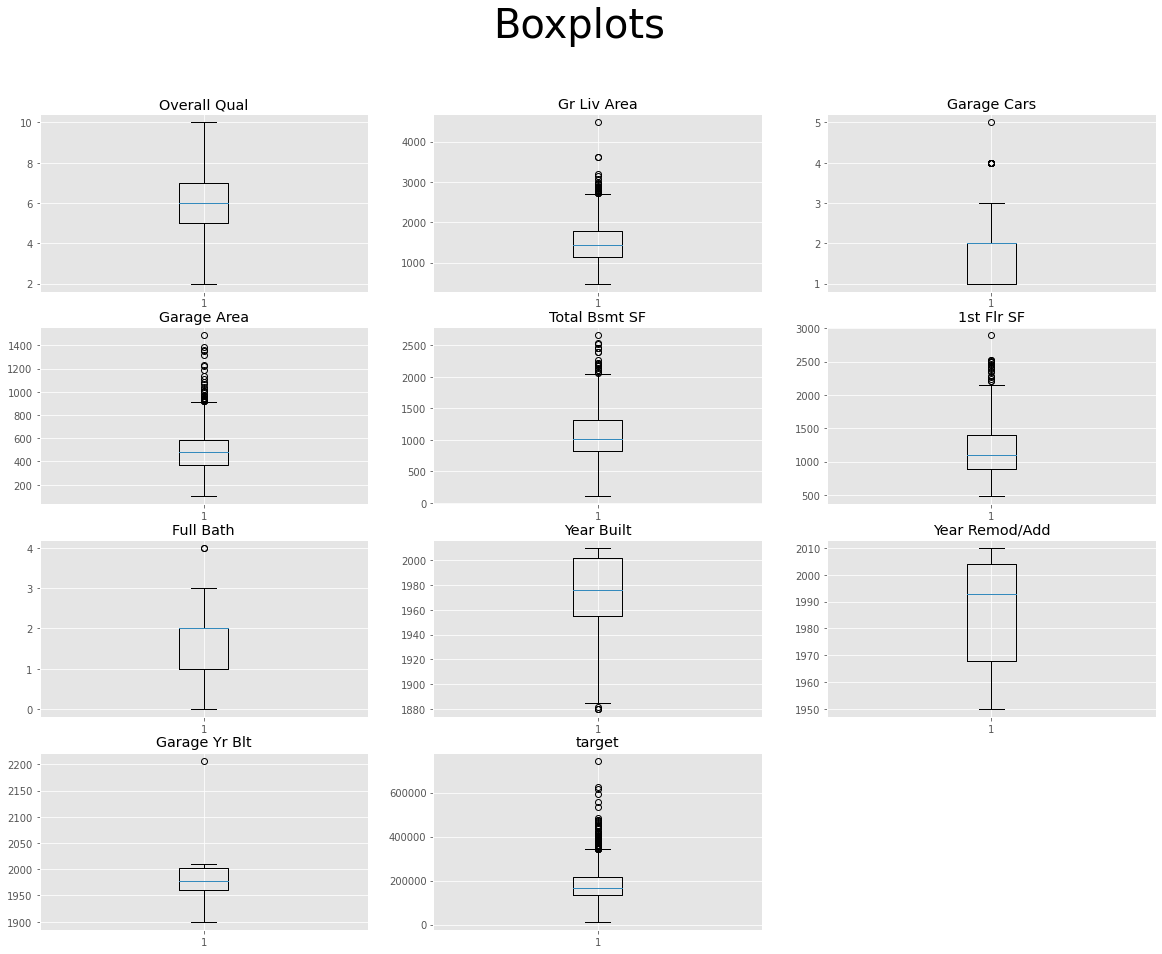

In [71]:
# 수치형 데이터(numeric_feature)의 시각화

%matplotlib inline
plt.style.use("ggplot") #숫자가 격자로 눈에 잘 띄도록 하기 위한 스타일
feature=numeric_feature 

# Boxplot을 사용해서 데이터의 분포를 살펴보기
plt.figure(figsize=(20,15)) # 전체 figure의 크기 설정
plt.suptitle("Boxplots", fontsize=40) #전체 figure의 제목 옵션 설정

for i in range(len(feature)):# feature의 개수만큼 i를 반복
    plt.subplot(4,3,i+1) # boxplot의 자리 마련 subplot(nrow, ncol, index) (i+1의 이유 : range 함수를 쓰면 i가 0부터 시작)
    plt.title(feature[i]) # 개별 boxplot의 제목을 [i]번째 feature로 설정
    plt.boxplot(data[feature[i]]) # data의 i번째 feature를 boxplot으로 그리기
plt.show()


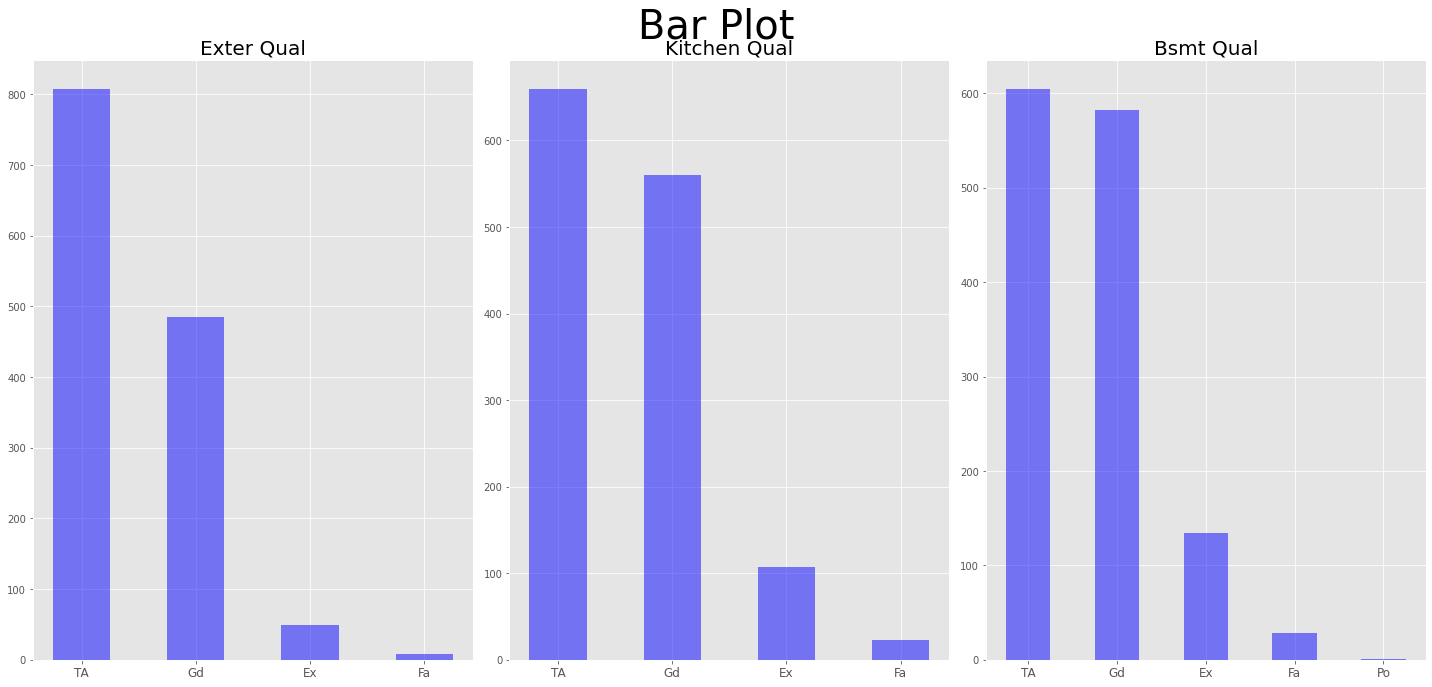

In [75]:
# 카테고리형 데이터(categorical_feature)의 시각화
feature=categorical_feature

plt.figure(figsize=(20,10)) # 전체 figure의 x축길이, y축길이 (inch)
plt.suptitle("Bar Plot", fontsize=40) # 전체 figure의 제목 옵션 설정

for i in range(len(feature)): 
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp=data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()